In [5]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost

In [6]:
# летний сезон
# по сумме растрат   user_to_season_payment
# по txn    user_to_season_txn

money_train = pd.read_csv("qiwi_money_out_data_train.csv", encoding='windows-1251',  delimiter=';')
money_train[:3]
users = np.unique(np.asarray(money_train.user_id))
user_to_season_txn = {}
user_to_season_payment = {}

for i in money_train.iterrows():
    if i[1].date_month == '2016-06' or i[1].date_month == '2016-07' or i[1].date_month == '2016-08':
        if i[1].user_id in user_to_season_txn:
            user_to_season_txn[i[1].user_id] += i[1].txn_count
            user_to_season_payment[i[1].user_id] += i[1].payment
        else:
            user_to_season_txn[i[1].user_id] = i[1].txn_count
            user_to_season_payment[i[1].user_id] = i[1].payment
    else:
        if  not (i[1].user_id in user_to_season_txn):
            user_to_season_txn[i[1].user_id] = 0
            user_to_season_payment[i[1].user_id] = 0
#user_to_season_payment

In [7]:
#Средний разовый платеж
# словарь dict_one_payment

money_train = pd.read_csv("qiwi_money_out_data_train.csv", encoding='windows-1251',  delimiter=';')
dict_one_payment = dict.fromkeys(['user_id', 'f6'])

for i in users:
    user = money_train[money_train['user_id'] == i]
    dict_one_payment[i] = np.average(user.payment / user.txn_count)

#dict_one_payment

In [8]:
money_train = pd.read_csv('qiwi_money_out_data_train.csv', encoding='windows-1251', delimiter=';')
answer_train = pd.read_csv('qiwi_users_profile_data_train.csv', encoding='windows-1251', delimiter=';')
money_test = pd.read_csv('qiwi_money_out_data_test.csv', encoding='windows-1251', delimiter=';')
answer_test = pd.read_csv('qiwi_users_profile_data_test.csv', encoding='windows-1251', delimiter=';')

In [15]:
#дисперсия
#Big_dic
users = np.unique(np.asarray(money_train.user_id))
money_train = pd.read_csv("qiwi_money_out_data_train.csv", encoding='windows-1251',  delimiter=';')
Women_profile = pd.read_csv('women_profiles.csv')
version_with_sexes = money_train

mas = []
for j in ['2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12']:
    date_6 = version_with_sexes[version_with_sexes.date_month == j]
    D_date_6 = {}
    for i in date_6.iterrows():
        if i[1].user_id in D_date_6:
            D_date_6[i[1].user_id] += i[1].txn_count
        else:
            D_date_6[i[1].user_id] = i[1].txn_count
    for i in users:
        if not i in D_date_6:
            D_date_6[i] = 0
    mas.append(D_date_6)

import stat as st

def dispersion(a):
    av = np.average(a)
    s = 0
    for x in a:
        s += (x - av) * (x - av)
    return s/len(a)

Big_dic1 = {}
for i in users:
    Big_dic1[i] = dispersion([mas[0][i], mas[1][i], mas[2][i], mas[3][i], mas[4][i], mas[5][i], mas[6][i]])

In [9]:
#дисперсия
#Big_dic
users = np.unique(np.asarray(money_train.user_id))
money_train = pd.read_csv("qiwi_money_out_data_train.csv", encoding='windows-1251',  delimiter=';')
Women_profile = pd.read_csv('women_profiles.csv')
version_with_sexes = money_train

mas = []
for j in ['2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12']:
    date_6 = version_with_sexes[version_with_sexes.date_month == j]
    D_date_6 = {}
    for i in date_6.iterrows():
        if i[1].user_id in D_date_6:
            D_date_6[i[1].user_id] += i[1].payment
        else:
            D_date_6[i[1].user_id] = i[1].payment
    for i in users:
        if not i in D_date_6:
            D_date_6[i] = 0
    mas.append(D_date_6)

import stat as st

def dispersion(a):
    av = np.average(a)
    s = 0
    for x in a:
        s += (x - av) * (x - av)
    return s/len(a)

Big_dic = {}
for i in users:
    Big_dic[i] = dispersion([mas[0][i], mas[1][i], mas[2][i], mas[3][i], mas[4][i], mas[5][i], mas[6][i]])

In [10]:
# ставим в соответствие человеку вероятность того, что выпускник его университета - мужчина
# user_id_to_variety_university - нужный словарь

universities = pd.read_csv('qiwi_users_profile_data_train.csv', encoding='windows-1251',  delimiter=';')
w_un = {}
m_un = {}
un = pd.unique(np.asarray(universities.university))
un.sort()
for i in universities.iterrows():
    if i[1].sex=='Жен':
        if not i[1].university in m_un:
            m_un[i[1].university] = 0
        if i[1].university in w_un:
            w_un[i[1].university] += 1
        else:
            w_un[i[1].university] = 1
    else:
        if not i[1].university in w_un:
            w_un[i[1].university] = 0
        if i[1].university in m_un:
            m_un[i[1].university] += 1
        else:
            m_un[i[1].university] = 1
w_un2 = []
for i in w_un.keys():
    w_un2.append([i, w_un[i]])
m_un2 = []
for i in m_un.keys():
    m_un2.append([i, m_un[i]])
w_un2.sort()
m_un2.sort()
w_3 = [i[1] for i in w_un2]
m_3 = [i[1] for i in m_un2]
w_3 = np.array(w_3)
m_3 = np.array(m_3, dtype=float)
univer_to_variety = {}
universities1 = pd.DataFrame({'university': un, 'M' : m_3, 'W' : w_3, 'M/(M+W)': 1. * m_3/(m_3+w_3+0.0)})
for i in universities1.iterrows():
    univer_to_variety[i[1].university] = i[1]['M/(M+W)']
#print (univer_to_variety)


user_id_to_variety_university = {}
for i in universities.iterrows():
    user_id_to_variety_university[i[1].user_id] = univer_to_variety[i[1].university]
#print (universities1.sort_values(by = 'M/(M+W)'))
#print (user_id_to_variety_university)

In [11]:
#признак - кол-во транзакций
person_to_number_of_transactions = {}
for i in money_train.iterrows():
    if i[1].user_id in person_to_number_of_transactions:
        person_to_number_of_transactions[i[1].user_id] += i[1].txn_count
    else:
        person_to_number_of_transactions[i[1].user_id] = i[1].txn_count

In [12]:
# признак - отношение транзакций по топ 2 категорий ко всему кол-ву транзакций
users = np.unique(money_train.user_id)
dict_2_top = dict.fromkeys(['user_id', 'f8'])  
for i in users:
    user_data = money_train[money_train['user_id'] == i]
    la = user_data.groupby('category')['txn_count'].sum()
    la = la.sort_values(ascending=False)
    dict_2_top[i] = (1. * np.sum(la[:2]) / np.sum(la))
#dict_2_top

In [13]:
#categroies payments features
k = 38
categories = money_train['category'].value_counts().keys()
category_counts = len(categories)
dict_users_buys = {}
for ind, row in money_train.iterrows():
    people_id = row['user_id']
    category_name = row['category']
    payment = row['payment']
    if (not people_id in dict_users_buys.keys()):
        dict_users_buys[people_id] = dict.fromkeys(categories[:k], 0)
    if (category_name in dict_users_buys[people_id].keys()):
        dict_users_buys[people_id][category_name] += payment 
category_to_index = {}
for i in range(len(categories)):
    category_to_index[categories[i]] = i
#dict_users_buys

In [30]:
#create need train data with features for sklearn algorithms
h = 3
def create_data_train():
    trainX = []
    trainY = []
    for key, value in dict_users_buys.items():
        ind = key
        grad_year = list(answer_train[answer_train.user_id == ind].graduation_year)[0]
        if (list(answer_train[answer_train.user_id == ind].sex)[0] == u'Муж'):
            trainY.append(1)
        else:
            trainY.append(0)
        res = []
        res.append(person_to_number_of_transactions[ind]) #transactions_count
        res.append(dict_2_top[ind]) #top transaction div all transaction
        res.append(user_id_to_variety_university[ind])#sex of students after their university
        res.append(Big_dic[ind])#dispersia
        res.append(Big_dic1[ind])#По txn_count
        res.append(user_to_season_txn[ind])
        res.append(user_to_season_payment[ind])
        res.append(dict_one_payment[ind])
        #for i in range(h):
        #    res.append(dict_top_money[ind][i]) #most payment categories
        for i in categories[:k]:
            res.append(value[i]) #categories payments
        trainX.append(res)
    return trainX, trainY
trainX, trainY = create_data_train()

In [31]:
print(len(trainX))

10795


In [32]:
def make_data_normalize(trainX):
    trainX = np.array(trainX)
    m = np.mean(trainX, axis=0)
    std = np.std(trainX, axis=0)
    trainX = ((trainX - m)  / std)
    return trainX
#trainX = make_data_normalize(trainX)
print(len(trainX))

10795


In [33]:
train_fitX, train_valX, train_fitY, train_valY = train_test_split(trainX, trainY, test_size=0.15)
train_f1X, train_f2X, train_f1Y, train_f2Y = train_test_split(train_fitX, train_fitY, test_size=0.5)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score

rfc = RandomForestClassifier(random_state = 241,n_estimators=1000,n_jobs=-1, min_samples_split=1, max_depth=18, 
                            min_samples_leaf= 3, criterion = 'gini')
rfc.fit(train_f1X, train_f1Y)
predict_valY = rfc.predict(train_valX)
print(accuracy_score(train_valY,predict_valY))
print(len(train_valY))
print(sum(train_valY))
print(len(train_fitX))
print(sum(train_fitY))

0.790740740741
1620
1215
9175
7011


In [35]:
print(train_f2X[0])
print(len(train_f2X))

[4, 1.0, 0.6782608695652174, 11155.102040816328, 0.24489795918367346, 2, 450, 160.0, 0, 0, 640, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4588


In [36]:
ppp = rfc.predict_proba(train_f2X)
for i in range(len(train_f2X)):
    train_f2X[i].append(ppp[i][0])
qqq = rfc.predict_proba(train_valX)
for i in range(len(train_valX)):
    train_valX[i].append(qqq[i][0])

In [37]:
import xgboost
from sklearn.metrics import roc_curve, accuracy_score
model = xgboost.XGBClassifier()


train_f2X = np.array(train_f2X)
train_valX = np.array(train_valX)
train_f2Y = np.array(train_f2Y)
train_valY = np.array(train_valY)


model.fit(train_f2X, train_f2Y)
predict_valY = model.predict(train_valX)
print(accuracy_score(train_valY,predict_valY))
print(len(train_valY))
print(sum(train_valY))

0.797530864198
1620
1215


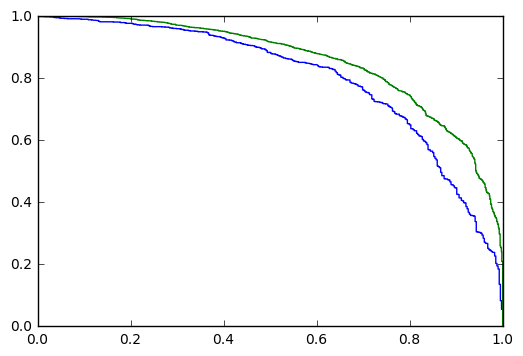

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline
fpr,tpr,_ = roc_curve(train_valY,model.predict_proba(train_valX)[:,1])
plt.plot(1-fpr,tpr)
fpr,tpr,_ = roc_curve(train_f2Y,model.predict_proba(train_f2X)[:,1])
plt.plot(1-fpr,tpr)
plt.savefig('results_rfc_ans.png')

In [ ]:
money_train = pd.read_csv("qiwi_money_out_data_train.csv", encoding='windows-1251',  delimiter=';')
money_train[:3]
users = np.unique(np.asarray(money_train.user_id))
user_to_season_txn = {}
user_to_season_payment = {}

for i in money_train.iterrows():
    if i[1].date_month == '2016-06' or i[1].date_month == '2016-07' or i[1].date_month == '2016-08':
        if i[1].user_id in user_to_season_txn:
            user_to_season_txn[i[1].user_id] += i[1].txn_count
            user_to_season_payment[i[1].user_id] += i[1].payment
        else:
            user_to_season_txn[i[1].user_id] = i[1].txn_count
            user_to_season_payment[i[1].user_id] = i[1].payment
    else:
        if  not (i[1].user_id in user_to_season_txn):
            user_to_season_txn[i[1].user_id] = 0
            user_to_season_payment[i[1].user_id] = 0

In [ ]:
money_train = pd.read_csv("qiwi_money_out_data_train.csv", encoding='windows-1251',  delimiter=';')
dict_one_payment = dict.fromkeys(['user_id', 'f6'])

for i in users:
    user = money_train[money_train['user_id'] == i]
    dict_one_payment[i] = np.average(user.payment / user.txn_count)

In [ ]:
k = 38
categories = money_test['category'].value_counts().keys()
category_counts = len(categories)
dict_users_buys = {}
for ind, row in money_test.iterrows():
    people_id = row['user_id']
    category_name = row['category']
    payment = row['payment']
    if (not people_id in dict_users_buys.keys()):
        dict_users_buys[people_id] = dict.fromkeys(categories[:k], 0)
    if (category_name in dict_users_buys[people_id].keys()):
        dict_users_buys[people_id][category_name] += payment 
category_to_index = {}
for i in range(len(categories)):
    category_to_index[categories[i]] = i

In [ ]:
X = []
Y = []
for key, value in dict_users_buys.items():
    ind = key
    grad_year = list(answer_test[answer_test.user_id == ind].graduation_year)[0]
    if (list(answer_test[answer_test.user_id == ind].sex)[0] == u'Муж'):
        Y.append(1)
    else:
        Y.append(0)
    res = []
    res.append(person_to_number_of_transactions[ind]) #transactions_count
    res.append(dict_2_top[ind]) #top transaction div all transaction
    res.append(user_id_to_variety_university[ind])#sex of students after their university
    res.append(Big_dic[ind])#dispersia
    res.append(Big_dic1[ind])#По txn_count
    res.append(user_to_season_txn[ind])
    res.append(user_to_season_payment[ind])
    res.append(dict_one_payment[ind])
    #for i in range(h):
    #    res.append(dict_top_money[ind][i]) #most payment categories
    for i in categories[:k]:
        res.append(value[i]) #categories payments
    X.append(res)

In [ ]:
def make_data_normalize(trainX):
    trainX = np.array(trainX)
    m = np.mean(trainX, axis=0)
    std = np.std(trainX, axis=0)
    trainX = ((trainX - m)  / std)
    return trainX
trainX = make_data_normalize(trainX)
print(len(trainX))

10795


In [ ]:
#and additional priznak from LogisticRegression
from sklearn.linear_model import LogisticRegression
train_fitX, train_valX, train_fitY, train_valY = train_test_split(trainX, trainY, test_size=0.10,random_state=472)
tree = LogisticRegression()
tree.fit(train_fitX, train_fitY)
predict_valY = tree.predict(train_valX)
fpr,tpr,_ = roc_curve(train_valY,rfc.predict_proba(train_valX)[:,1])
plt.plot(1-fpr,tpr)
fpr,tpr,_ = roc_curve(train_fitY,rfc.predict_proba(train_fitX)[:,1])
plt.plot(1-fpr,tpr)
plt.savefig('results_tree.png')
def update_data_train_with_tree(trainX):
    for i in trainX:
        predict = tree.predict_proba(i)
        i.append(predict)
    return trainX
trainX = update_data_train_with_tree(trainX)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score

rfc = RandomForestClassifier(random_state = 241,n_estimators=1000,n_jobs=-1, min_samples_split=1, max_depth=18, 
                            min_samples_leaf= 3, criterion = 'gini')
train_fitX, train_valX, train_fitY, train_valY = train_test_split(trainX, trainY, test_size=0.07,random_state=111)
#train_fitX, train_fitY = make_data_balanced(train_fitX, train_fitY)
rfc.fit(train_fitX, train_fitY)
predict_valY = rfc.predict(train_valX)
print(accuracy_score(train_valY,predict_valY))
print(len(train_valY))
print(sum(train_valY))
print(len(train_fitX))
print(sum(train_fitY))

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score


train_X_part_1, test_X_part_3, train_Y_part_1, test_Y_part_3 = train_test_split(trainX, trainY, test_size=0.3, random_state=111)
train_X_part_1, train_X_part_2, train_Y_part_1, train_Y_part_2 = train_test_split(train_X_part_1, train_Y_part_1, test_size=0.5, random_state=111)

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
fpr,tpr,_ = roc_curve(train_valY,rfc.predict_proba(train_valX)[:,1])
plt.plot(1-fpr,tpr)
fpr,tpr,_ = roc_curve(train_fitY,rfc.predict_proba(train_fitX)[:,1])
plt.plot(1-fpr,tpr)
plt.savefig('results_rfc.png')

In [ ]:
rfc.feature_importances_

In [ ]:
trainX_age = []
trainY_age = []
answer_train_without_NaNs = answer_train.dropna()
for key, value in dict_users_buys.items():
    indY = key
    try:
        grad_year = list(answer_train_without_NaNs[answer_train_without_NaNs.user_id == indY].graduation_year)[0]
        trainY.append((list(answer_train_without_NaNs[answer_train_without_NaNs.user_id == indY].age)[0]) // 10)
        res = [grad_year]
        res.append(person_to_number_of_transactions[ind]) #transactions_count
        res.append(dict_2_top[ind]) #top transaction div all transaction
        res.append(user_id_to_variety_university[ind])#sex of students after their university
        res.append(Big_dic[ind])#dispersia
        res.append(Big_dic1[ind])#По txn_count
        res.append(user_to_season_txn[ind])
        res.append(user_to_season_payment[ind])
        for i in categories[:k]:
            res.append(value[i])
        trainX.append(res)
    except:
        IndexError

In [62]:
#Ligistic Regression
def get_score_and_clf_regression(k, balanced):
    categories = money_train['category'].value_counts().keys()
    category_counts = len(categories)
    dict_users_buys = {}
    for ind, row in money_train.iterrows():
        people_id = row['user_id']
        category_name = row['category']
        payment = row['payment']
        if (not people_id in dict_users_buys.keys()):
            dict_users_buys[people_id] = dict.fromkeys(categories[:k], 0)
        if (category_name in dict_users_buys[people_id].keys()):
            dict_users_buys[people_id][category_name] += payment 
    trainX = []
    trainY = []
    for key, value in dict_users_buys.items():
        indY = key
        if (list(answer_train[answer_train.user_id == indY].sex)[0] == u'Муж'):
            trainY.append(1)
        else:
            trainY.append(0)
        res = []
        for i in categories[:k]:
            res.append(value[i])
        trainX.append(res)
    if (balance):
        counter = [0, 0]
        trainX_balanced = []
        trainY_balanced = []
        for i in range(len(trainY)):
            if (counter[0] <= counter[1] and trainY[i] == 0 or counter[1] <= counter[0] and trainY[i] == 1):
                trainX_balanced.append(trainX[i])
                trainY_balanced.append(trainY[i])
                counter[trainY[i]] += 1
        trainX = trainX_balanced
        trainY = trainY_balanced
    train_fitX, train_valX, train_fitY, train_valY = train_test_split(trainX, trainY, test_size=0.15,random_state=42)
    tree = LogisticRegression()
    tree.fit(train_fitX, train_fitY)
    predict_valY = tree.predict(train_valX)
    return [k, accuracy_score(tree.predict(train_fitX), train_fitY), accuracy_score(predict_valY, train_valY), tree]

In [12]:
# признак - топ k id categories по деньгам
def get_users_categories_payment_top(k):
    dict_users_payment = {}
    for key, value in dict_users_buys.items():
        dict_users_payment[key] = []
        for categ, money in value.items():
            dict_users_payment[key].append([money, categ])
        dict_users_payment[key].sort()
        for i in range(len(dict_users_payment[key])):
            dict_users_payment[key][i] = category_to_index[dict_users_payment[key][i][1]]
        dict_users_payment[key] = dict_users_payment[key][:k]
    return dict_users_payment
dict_top_money = get_users_categories_payment_top(3)

In [30]:
#create data balanced
def make_data_balanced(trainX, trainY):
    counter = [0, 0]
    trainX_balanced = []
    trainY_balanced = []
    for i in range(len(trainY)):
        if (counter[0] <= counter[1] and trainY[i] == 0 or counter[1] <= counter[0] and trainY[i] == 1):
            trainX_balanced.append(trainX[i])
            trainY_balanced.append(trainY[i])
            counter[trainY[i]] += 1
    trainX = trainX_balanced
    trainY = trainY_balanced
    return trainX, trainY
trainX, trainY = make_data_balanced(trainX, trainY)

In [ ]:
regression_result_val = [[], []]
regression_result_train = [[], []]
for i in range(1, 26):
    tmp = get_score(2 * i, True)
    regression_result_val[0].append(tmp[0])
    regression_result_val[1].append(tmp[2])
    regression_result_train[0].append(tmp[0])
    regression_result_train[1].append(tmp[1])
plt.plot(regression_result_val[0], regression_result_val[1])

In [ ]:
#Linear SVC
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state = 241)
train_fitX, train_valX, train_fitY, train_valY = train_test_split(trainX, trainY, test_size=0.15,random_state=42)
svc.fit(train_fitX, train_fitY)
predict_valY = svc.predict(train_valX)
print(accuracy_score(predict_valY, train_valY))
print(svc.coef_)
print(svc.decision_function)

In [ ]:
def getDispersion(df):
    #дисперсия
    #Big_dic
    users = np.unique(np.asarray(money_train.user_id))
    money_train = pd.read_csv("qiwi_money_out_data_test.csv", encoding='windows-1251',  delimiter=';')
    Women_profile = pd.read_csv('women_profiles.csv')
    version_with_sexes = money_train

    mas = []
    for j in ['2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12']:
        date_6 = version_with_sexes[version_with_sexes.date_month == j]
        D_date_6 = {}
        for i in date_6.iterrows():
            if i[1].user_id in D_date_6:
                D_date_6[i[1].user_id] += i[1].txn_count
            else:
                D_date_6[i[1].user_id] = i[1].txn_count
        for i in users:
            if not i in D_date_6:
                D_date_6[i] = 0
        mas.append(D_date_6)

    import stat as st

    def dispersion(a):
        av = np.average(a)
        s = 0
        for x in a:
            s += (x - av) * (x - av)
        return s/len(a)

    Big_dic1 = {}
    for i in users:
        Big_dic1[i] = dispersion([mas[0][i], mas[1][i], mas[2][i], mas[3][i], mas[4][i], mas[5][i], mas[6][i]])